## **Moving Average Convergence Divergence - MACD indicator and backtesting**
---
Conditions:
*   https://www.investopedia.com/terms/m/macd.asp
*   TESLA stocks from 01.11.2010
*   MACD = EMA26 - EMA12
*   Signal line = EMA9

### 1. Libraries

In [50]:
#Import the libraries
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

### 2. Download the data from yahoofinance

In [51]:
#Load the data from yahoofinance
df = yf.download('TSLA', start= '2010-11-01')
#Set the data as the index
df.index.name = None
df['Date'] = df.index
#Show the data
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Date
2010-11-01,4.388,4.550,4.262,4.282,4.282,2279000,2010-11-01
2010-11-02,4.336,4.376,4.210,4.250,4.250,1612500,2010-11-02
2010-11-03,4.256,4.500,4.232,4.354,4.354,1863000,2010-11-03
2010-11-04,4.520,5.066,4.430,4.980,4.980,9370000,2010-11-04
2010-11-05,4.974,4.994,4.744,4.888,4.888,5055000,2010-11-05


### 3. Calculation the signals Buy / Sell

In [52]:
#Adding the signals to the DataFrame
#ewm - exponential weighted functions
def MACD(df):
  df['EMA12'] = df.Close.ewm(span=12).mean()
  df['EMA26'] = df.Close.ewm(span=26).mean()
  df['MACD'] = df.EMA12 - df.EMA26
  df['signal'] = df.MACD.ewm(span=9).mean()
  print('Indicators added')

In [53]:
MACD(df)

Indicators added


In [54]:
#Show the data
df.head()

,Open,High,Low,Close,Adj Close,Volume,Date,EMA12,EMA26,MACD,signal
2010-11-01,4.388,4.550,4.262,4.282,4.282,2279000,2010-11-01,4.282000,4.282000,0.000000,0.000000
2010-11-02,4.336,4.376,4.210,4.250,4.250,1612500,2010-11-02,4.264667,4.265385,-0.000718,-0.000399
2010-11-03,4.256,4.500,4.232,4.354,4.354,1863000,2010-11-03,4.299534,4.297223,0.002310,0.000711
2010-11-04,4.520,5.066,4.430,4.980,4.980,9370000,2010-11-04,4.514330,4.488098,0.026232,0.009357
2010-11-05,4.974,4.994,4.744,4.888,4.888,5055000,2010-11-05,4.615855,4.580837,0.035018,0.016990


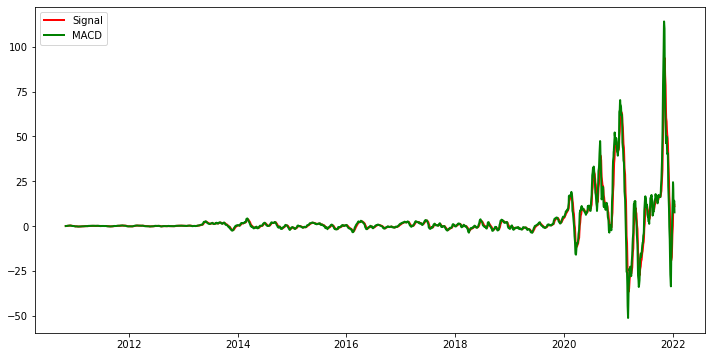

In [55]:
#Plot MACD and signal line
plt.figure(figsize=(12,6))
plt.plot(df.signal, label='Signal', color='red',linewidth=2)
plt.plot(df.MACD, label='MACD', color='green', linewidth=2)
plt.legend()
plt.show()

In [56]:
#Buying and Selling signals
Buy, Sell = [], []
for i in range(2, len(df)):
  if df.MACD.iloc[i] > df.signal.iloc[i] and df.MACD.iloc[i-1] < df.signal.iloc[i-1]:
    Buy.append(i)
  elif df.MACD.iloc[i] < df.signal.iloc[i] and df.MACD.iloc[i-1] > df.signal.iloc[i-1]:
    Sell.append(i)

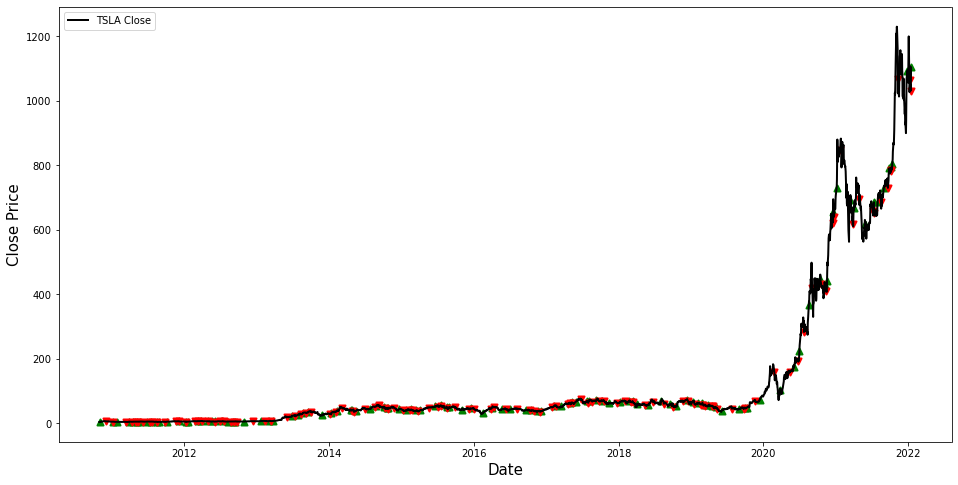

In [57]:
#Plot Buying and Selling signals
plt.figure(figsize=(16,8))
plt.scatter(df.iloc[Buy].index, df.iloc[Buy].Close, marker="^", color='green', linewidth=2)
plt.scatter(df.iloc[Sell].index, df.iloc[Sell].Close, marker="v", color='red', linewidth=2)
plt.plot(df.Close, label='TSLA Close', color='k', linewidth=2)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Close Price', fontsize=15)
plt.legend()
plt.show()

### 3. Backtesting

In [58]:
#Signal is generated for close price and can be managed on the next day
Realbuys = [i+1 for i in Buy]
Realsells = [i+1 for i in Sell]

In [59]:
#Buy or Sell open price on the next day when the signal was generated
Buyprices = df.Open.iloc[Realbuys]
Sellprices = df.Open.iloc[Realsells]

In [60]:
#In case we have Selling signal first but no buying point before
if Sellprices.index[0] < Buyprices.index[0]:
  Sellprices = Sellprices.drop(Sellprices.index[0])
#The last signal has to be Sell 
elif Buyprices.index[-1] > Sellprices.index[-1]:
  Buyprices = Buyprices.drop(Buyprices.index[-1])

In [61]:
#Relative profit
profitsrel = []

for i in range(len(Sellprices)):
  profitsrel.append((Sellprices[i] - Buyprices[i])/Buyprices[i])

In [62]:
#Average profit on one signal
print('Average profit on one signal:')
print(sum(profitsrel)/len(profitsrel)*100, '%')

Average profit on one signal:
4.7385572338994395 %
